In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = load_breast_cancer()
x = data.data
y = data.target

In [5]:
x[0], y[0]

(array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]),
 np.int64(0))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

/opt/anaconda3/envs/mlflow3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [10]:
y_prob = model.predict_proba(x_test)[:, 1]

In [14]:
pr = average_precision_score(y_test, y_prob)
print(f"PR: {pr}")

PR: 0.9939667519017099


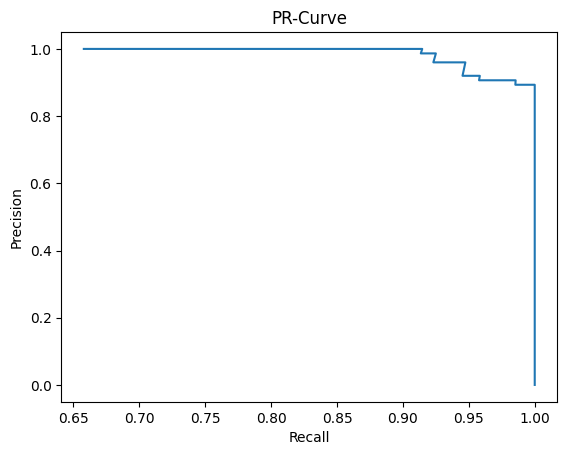

In [13]:
pr, rc, _ = precision_recall_curve(y_test, y_prob)
plt.plot(pr, rc)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-Curve")
plt.show()

In [15]:
indicies = np.arange(len(y_prob))

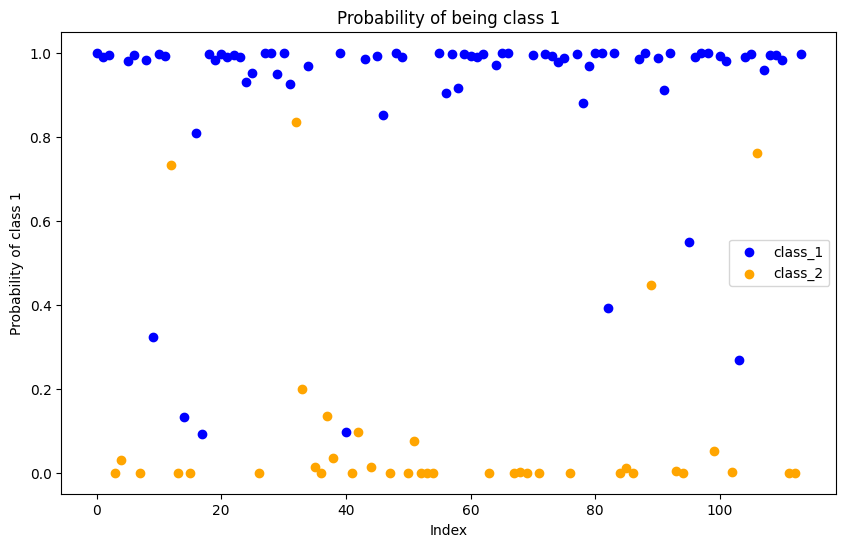

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(indicies[y_test==1], y_prob[y_test==1], color='blue', label='class_1')
plt.scatter(indicies[y_test==0], y_prob[y_test==0], color='orange', label='class_2')

plt.xlabel("Index")
plt.ylabel("Probability of class 1")
plt.title("Probability of being class 1")
plt.legend()
plt.show()